# MEGI001-2101033 Introduction to Earth System Data

## Task 6.3 - Data Handling Analysis (2-D)

Created on: Jan 25, 2019 by Ralph Florent <r.florent@jacobs-university.de>

## T6.3

* Please chooose another subset of europe and display using different colormaps
* Please display contours on individual maps at:
    * 100 m
    * 500 m
    * 1000 m

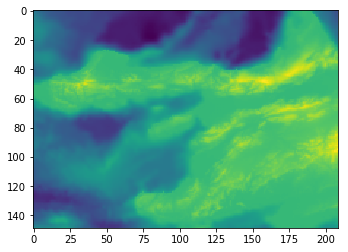

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Jan 25 2019

@author: Angelo Rossi, Ralph Florent
"""

# Import relevant libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import xarray as xr

# fname = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_onedeg/Best'  # Remote OPeNDAP Dataset 
filename = '../assets/data/geospatial-raster/haiti.nc'   # Local NetCDF file

f = xr.open_dataset(filename)

plt.imshow(f.Band1.data)
plt.show()


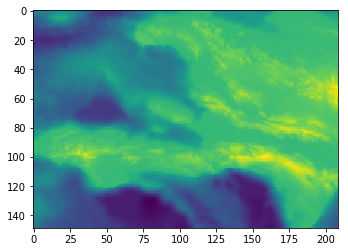

In [15]:
#plotting 
plt.imshow(flipped)
plt.show()

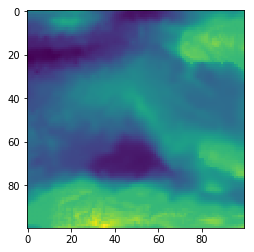

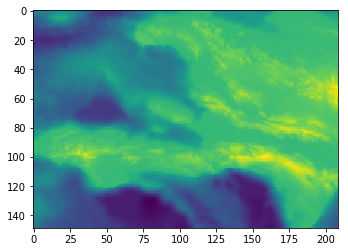

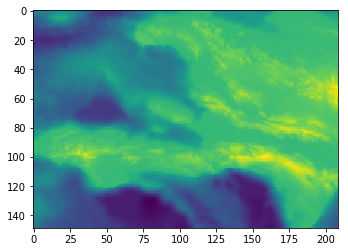

In [17]:
flipped = np.flipud(f.Band1.data)# it's flipped!
#subset
topoSubset_100 = flipped[0:100,0:100]
topoSubset_500 = flipped[0:500,0:500]
topoSubset_1000 = flipped[0:1000,0:1000]

plt.imshow(topoSubset_100)
plt.show()

plt.imshow(topoSubset_500)
plt.show()

plt.imshow(topoSubset_1000)
plt.show()

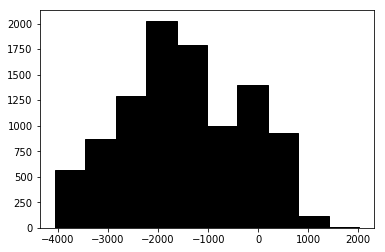

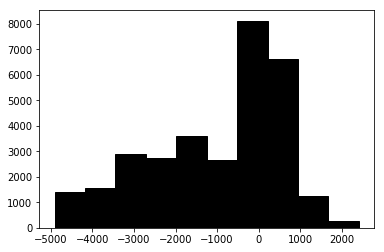

In [18]:
plt.hist(topoSubset_100.ravel(), bins=10, fc='k', ec='k')
plt.show()
plt.hist(topoSubset_500.ravel(), bins=10, fc='k', ec='k')
plt.show()

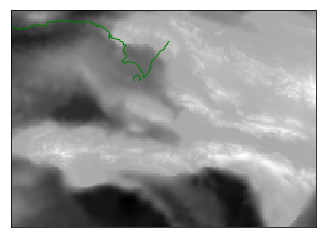

In [20]:
#http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at zero
contours = measure.find_contours(topoSubset, 0)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset_500, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

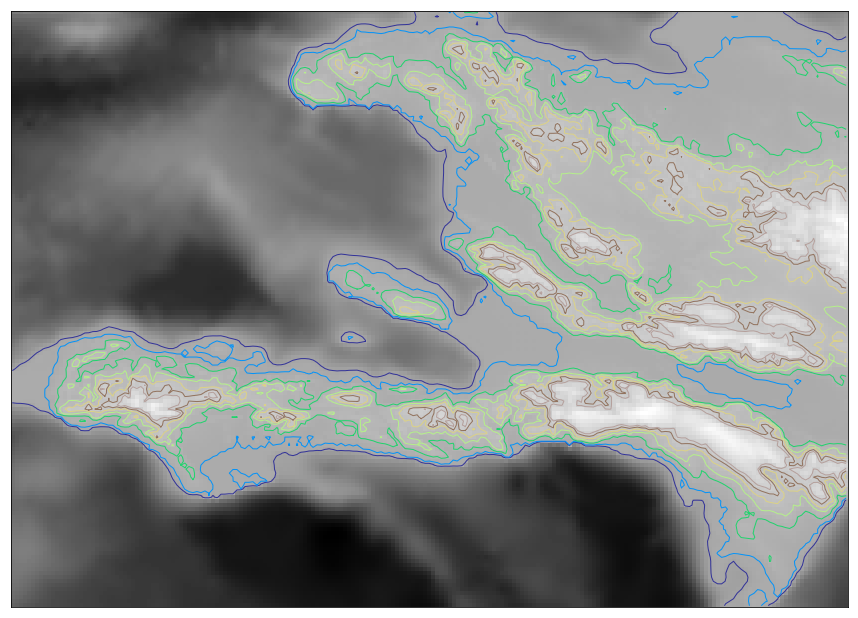

In [21]:
#Find countours and assign a value to them:
topoSubset = topoSubset_500
getContourSet = lambda topoSubset, elevation: [measure.find_contours(topoSubset, elevation), elevation]
#plot
#plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,15))
#fig.figure(figsize=(15,10))
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for i in range(-200,1200,200):
    cmapIndex=int(((i+200.)/(1200+200))*255)
    for n, contour in enumerate(getContourSet(topoSubset,i)[0]):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color=plt.cm.terrain(cmapIndex))
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

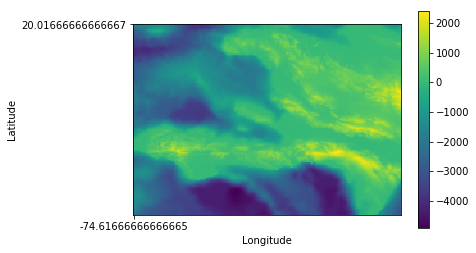

In [23]:
minlon = min(f.Band1.lon.values)
maxlon = max(f.Band1.lon.values)
minlat = min(f.Band1.lat.values)
maxlat = max(f.Band1.lat.values)

# plot with legend, x an y axis labels
fig, ax = plt.subplots()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.imshow(flipped)
plt.colorbar()

plt.show()

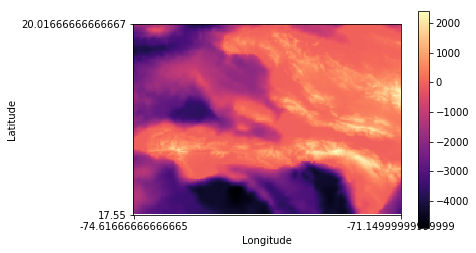

In [24]:
# plot with legend, x an y axis labels
fig, ax = plt.subplots()
# plt.imshow(flipped, cmap='rainbow')
plt.imshow(flipped, cmap='magma')
# plt.imshow(flipped, cmap='viridis') # the default one from above
plt.colorbar()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.show()

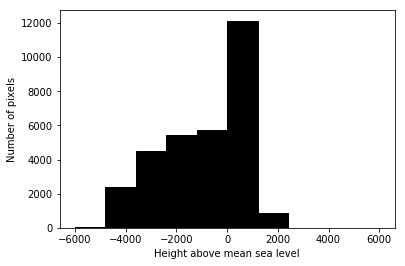

In [25]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=10, range=(-6000, 6000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()

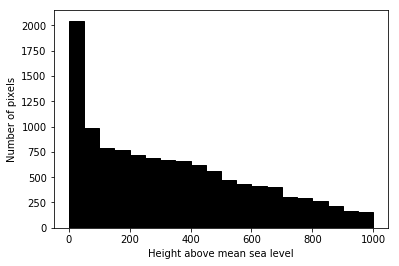

In [26]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=20, range=(0, 1000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()